/usr/share/fonts/SimHei.ttf
714
   price             定额单价             定量单价             量额比
0     56  56.000000000000  56.000000000000  1.000000000000
1     47  51.106796116505  51.500000000000  1.007693768997
2     36  44.835331230284  46.333333333333  1.033411197418
3     83  50.658747898456  55.500000000000  1.095565964466
4     48  50.103693359191  54.000000000000  1.077764858827
------ 0      1.000000000000
1      1.007693768997
2      1.033411197418
3      1.095565964466
4      1.077764858827
            ...      
708    2.161223526377
709    2.159352163230
710    2.158498491620
711    2.158013575374
712    2.161170778369
Name: 量额比, Length: 713, dtype: float64
508
   price             定额单价   定量单价             量额比
0     56  56.000000000000  56.00  1.000000000000
1     11  18.388059701493  33.50  1.821834415584
2     89  24.999544003648  52.00  2.080037939589
3     83  30.291468693468  59.75  1.972502575053
4     11  22.425600239711  50.00  2.229594725026
------ 0      1.000000000000

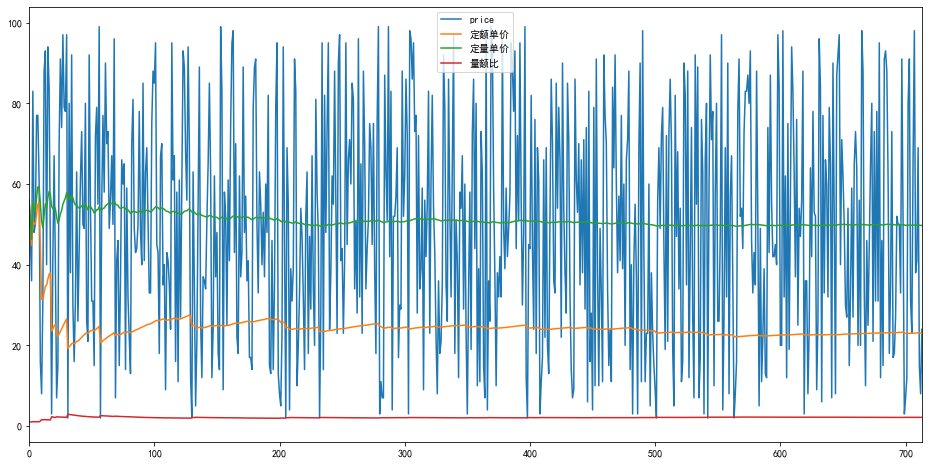

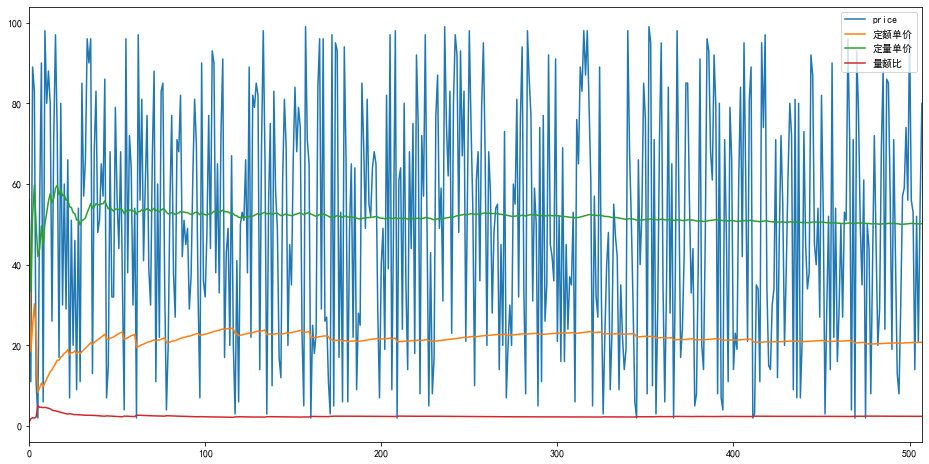

In [8]:
# %%timeit
########-----展现平均持有单价变化-----########
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

def eachtime():
    # 随机长度
    nday = random.randint(10,1000) #交易天数 通常在四年以内
    minpi,maxpi= 2,100 #价格最小最大值
    # 随机矩阵 n 行 1 列
    rdarr = np.random.randint(minpi, maxpi, size=(nday,))
    df = pd.DataFrame(rdarr, columns=['price'])
    pd.set_option('precision', 12) #小数点精度
    
    #### 定额方式 ####
    df['amt_p-rec'] = 1.0/df['price'] # 价格倒数 p-rec
    df['amt_sum-vol'] = df['amt_p-rec'].cumsum() #定额总量，价格倒数累加求和
    df['定额单价'] = (df.index + 1)/df['amt_sum-vol'] #定额平均单价 = 总价/总量
    
    #### 定量方式 ####
    df['vol_sum-vol'] = df['price'].cumsum() # 定量总价
    df['定量单价'] = df['vol_sum-vol']/(df.index + 1) #定量平均单价 = 总价/总量
    
    df['量额比'] = df['定量单价']/df['定额单价'] 
    rstdf = df[['price','定额单价','定量单价','量额比']]
    print(nday) 
    rstdf.plot()
    print(rstdf.head())
    print("------", df['量额比'][:-1])

def init_font():
    font_name = 'SimHei' 
    plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.rcParams['font.sans-serif'].append(font_name)
    plt.rcParams['figure.figsize'] = 16, 8
    import matplotlib.font_manager
    matplotlib.font_manager._rebuild()
    print(matplotlib.font_manager.findfont(font_name))


def main(): 
    init_font()
    testcnt = 2 #000
    for i in range(testcnt):
        eachtime() #算单条
    print("-end-")

if __name__ == '__main__':
    main()

In [9]:
import matplotlib.pyplot as plt
font_name = 'SimHei' 
plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.sans-serif'].append(font_name)

print(plt.rcParams['font.sans-serif'])
print(plt.rcParams['font.family'])

['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif', 'SimHei']
['SimHei']


Text(0.5, 1.0, 'Whoo Hoo!!!')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


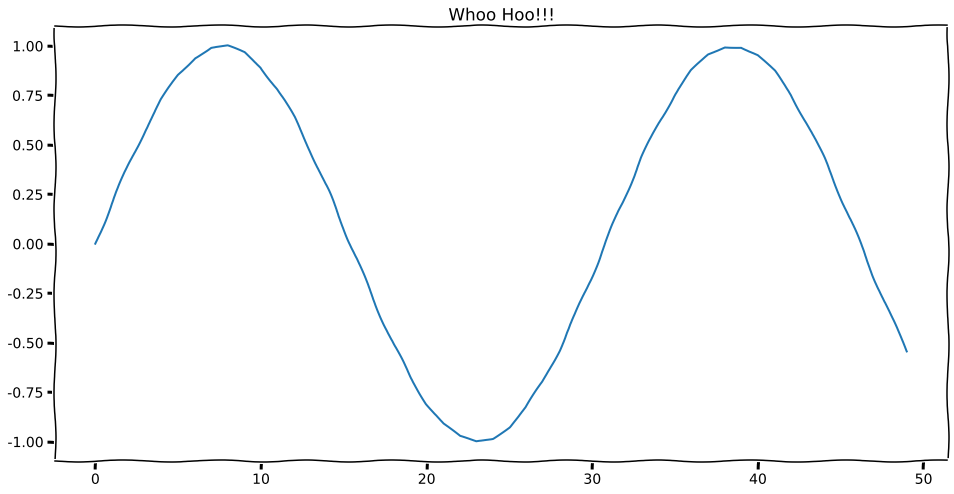

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.xkcd()
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('Whoo Hoo!!!')

-end-
main
Elapsed time: 1.1761082999873906


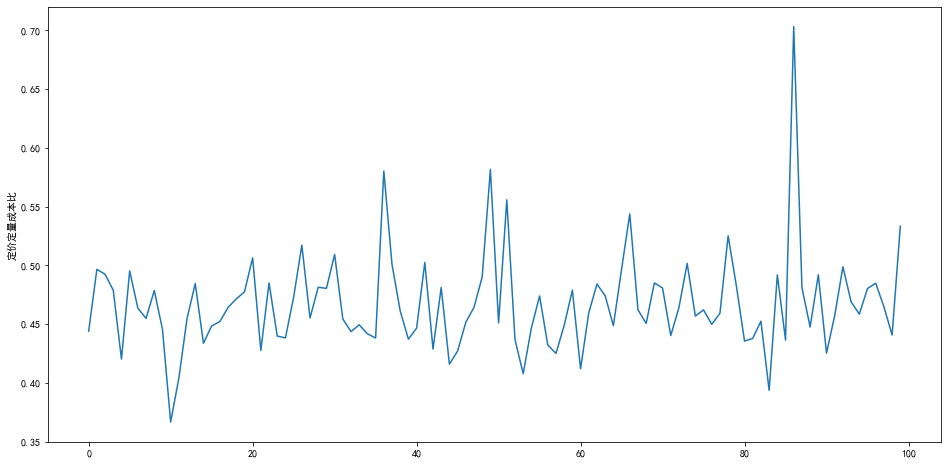

In [41]:
########-----量额比-----########
import pandas as pd
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

def eachtime():
    # 随机长度
    nday = random.randint(10,1000) #交易天数 通常在四年以内
    minpi,maxpi= 2,100 #价格最小最大值
    # 随机矩阵 n 行 1 列
    rdarr = np.random.randint(minpi, maxpi, size=(nday,))
    df = pd.DataFrame(rdarr, columns=['price'])
    pd.set_option('precision', 12) #小数点精度
    
    #### 定额方式 ####
    df['amt_p-rec'] = 1.0/df['price'] # 价格倒数 p-rec
    df['amt_sum-vol'] = df['amt_p-rec'].cumsum() #定额总量，价格倒数累加求和
    df['定额单价'] = (df.index + 1)/df['amt_sum-vol'] #定额平均单价 = 总价/总量
    
    #### 定量方式 ####
    df['vol_sum-vol'] = df['price'].cumsum() # 定量总价
    df['定量单价'] = df['vol_sum-vol']/(df.index + 1) #定量平均单价 = 总价/总量
    rstlb = '额量比'
    df[rstlb] = df['定额单价']/df['定量单价'] 
#     print("------", df['量额比'].iloc(-1))
    rst = df.iloc[-1].at[rstlb] #本次最终量价比
#     print(rst)
    return rst

def init_font():
    font_name = 'SimHei' 
    plt.rcParams['font.family'] = font_name #用来正常显示中文标签 
    plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
    plt.rcParams['font.sans-serif'].append(font_name)
    plt.rcParams['figure.figsize'] = 16, 8
    import matplotlib.font_manager
    matplotlib.font_manager._rebuild()
#     print(matplotlib.font_manager.findfont(font_name))

def _time_analyze_(func):
    t1_start = time.perf_counter()  
    func()
    t1_stop = time.perf_counter() 
    print(func.__name__)
    print("Elapsed time:", t1_stop - t1_start)  

def main(): 
    init_font()
    testcnt = 100 #计算次数
    arr=[]
    for i in range(testcnt):
        arr.append(eachtime()) #算单条

    plt.ylabel('定价定量成本比')
    plt.plot(arr)
#     plt.show()
    print("-end-")

if __name__ == '__main__':
    _time_analyze_(main)